## Instruksi
1. Copy colab file ke drive masing-masing
1. Rename file colab dengan format : NAMA_LENGKAP_DATASET.ipynb
1. Lengkapi bagian kode
1. Berikan dokumentasi pada setiap cell kode
---

### Import Seluruh Kebutuhan Library

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

### Load Dataset dan Tampilkan Isi Data
* load data dapat dilakukan melalui unggah file lokal maupun unduh data dari url ([contoh](https://colab.research.google.com/drive/1YP6BQpJKotuR61vPdv4-Ap-oFdqhDuJj))
* print standar, maupun menggunakan pandas

In [2]:
from sklearn.datasets import load_iris

# import some data to play with
iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Praproses Data
* cek jika terdapat record / field yang tidak layak dipakai
* lakukan praproses terhadap data-data tersebut

In [3]:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

### Visualisasikan Data
* Tampilkan visualisasi sederhana seperti plot, barchart, dll. [*hint*](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac99b93a20>]],
      dtype=object)

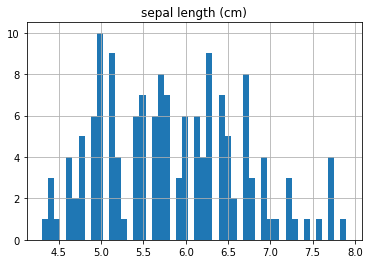

In [4]:
df.hist(column='sepal length (cm)', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac991e6f98>]],
      dtype=object)

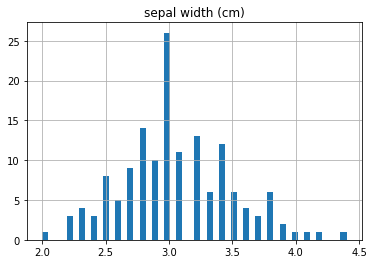

In [5]:
df.hist(column='sepal width (cm)', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faca44101d0>]],
      dtype=object)

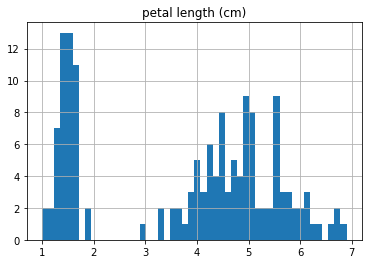

In [6]:
df.hist(column='petal length (cm)', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac967bcd68>]],
      dtype=object)

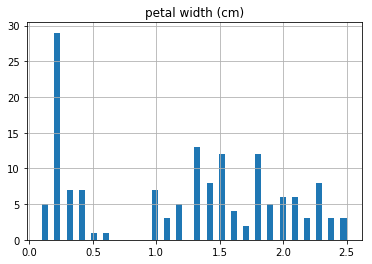

In [7]:
df.hist(column='petal width (cm)', bins=50)

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
X = df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']] .values  #.astype(float)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
y = df['target'].values
y[0:5]

array([0., 0., 0., 0., 0.])

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

### Bagi Data
* bagi data menjadi data latih dan data uji 
* pembagian membagi variabel data dan label
* bisa menggunakan library sklearn

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


### Uji Hasil Model
* Gunakan model yang telah kalian latih untuk melakukan prediksi menggunakan data uji.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [16]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2., 0., 2., 2., 2.])

### Latih Model Pembelajaran Mesin
* Gunakan classifier yang sesuai dengan yang diperintahkan dalam [***project description***](https://drive.google.com/open?id=158T8j6uasWUfb-O9ta9l8PayIllwWcax).

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333


### Evaluasi Performa: Confusion Matrix
* Tampilkan evaluasi performa dari model yang dibangun menggunakan [***Confusion Matrix***](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [18]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333])

### Visualisasi Hasil dan Performa
* Tampilkan visualisasi performa dari model yang dibuat

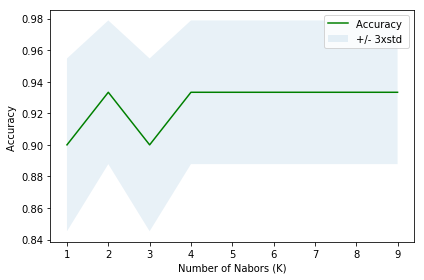

In [19]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### Evaluasi Performa: Akurasi dan F1 Score
* Tampilkan evaluasi performa dari model yang dibangun menggunakan [**Akurasi**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) dan [**F1 Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [20]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9333333333333333 with k= 2
